# Zadanie1 (1pkt): Rozważ dane dotyczące mikrobiomu roślinnego. Dokładniej:
    
- plik otuTable97.txt zawiera informacje o liczbie odczytów przypadających na dany OTU (gatunek lub grupa blisko spokrewnionych gatunków bakterii) w danej próbce; uwaga: podobnie jak w danych z sekwencjowania, próbki znajdują się w kolumnach
- plik SMD.txt zawiera metadane dotyczące próbek, gdzie występuje m.in. kolumna Type określająca miejsce pobrania próbki: root (korzeń), leaf (liść) oraz soil (sama gleba, nie związana bezpośrednio z korzeniem)

Co trzeba zrobić?

- otwórz plik otuTable97.txt, podaj rozmiar danych
- dokonaj transpozycji danych
- dokontaj tzw. normalizacji CLR (centred log-ratio tranformation): zastosuj operację $\log(x+1)$, następnie odejmij od wartośći średnią w kolumnie.
- wykonaj PCA(2), jaki procent wariancji objaśniamy za pomocą pierwszych dwóch komponent?
- wykonaj algorytm k-means z $k=2$ oraz $k=3$ na pełnym zbiorze danych oraz zredukowanych od dwóch cech - porównaj wyniki (wystarczy ocena wizualna na zredukowanych danych).
- narysuj wykres PCA2 vs PCA1, kolorując próbki wg kolumny Type z pliku SMD.txt, czy te grupy (przynajmniej częściowo) pokrywają się z którymś przypadkiem z poprzedniego zadania? Wystarczy ocena wizualana i komentarz :).

In [9]:
import pandas as pd
import numpy as np
df = pd.read_csv("otuTable97.txt", sep="\t")
print(df.shape) #rozmair danych (47806, 1699)
df = df.T
df.columns = df.iloc[0]  #pierwszy = nazwy kolumn
df = df[1:]  #usuń pierwszy wiersz (aktualnie nagłówek)

#clr
df_log = np.log1p(df)
col_means = df_log.mean(axis=0)
df_clr = df_log - col_means

print(df_clr.head())

(47806, 1699)
OTU_ID      1.0        2.0       3.0       4.0       5.0       6.0      \
M1024P1833      0.0   2.287145 -0.431892  1.290089  1.437294  0.758957   
M1551P81        0.0   1.684970 -0.461745  2.733542 -1.121016  2.956687   
M1551P57        0.0   0.158914 -2.086450  0.723561  2.515721  2.456240   
M1551P85        0.0   5.138402  4.860156  0.068417  1.951777  1.579938   
M1551P28        0.0  10.180122 -3.958252 -2.053950 -5.653615 -3.941523   

OTU_ID       7.0       8.0       9.0       10.0     ...   47797.0   47798.0  \
M1024P1833 -0.047340  1.235243 -0.052194 -1.252232  ... -0.000647 -0.001633   
M1551P81    2.308142  3.365681  0.653074  0.644888  ... -0.000647 -0.001633   
M1551P57    0.394493  2.733092  0.756022  1.890482  ... -0.000647 -0.001633   
M1551P85    2.080549 -2.363854  3.016426  4.228407  ... -0.000647 -0.001633   
M1551P28   -0.137724 -5.499348 -3.072619 -3.043992  ... -0.000647 -0.001633   

OTU_ID       47799.0   47800.0   47801.0  47802.0   47803.0   4780

In [10]:
from sklearn.decomposition import PCA
pca = PCA(2) 
data = pca.fit_transform(df_clr)

sum(pca.explained_variance_ratio_ * 100) #2 pierwsze komponenty wyjaśniają ok 32% wariancji, mało:((

np.float64(32.58324785278283)

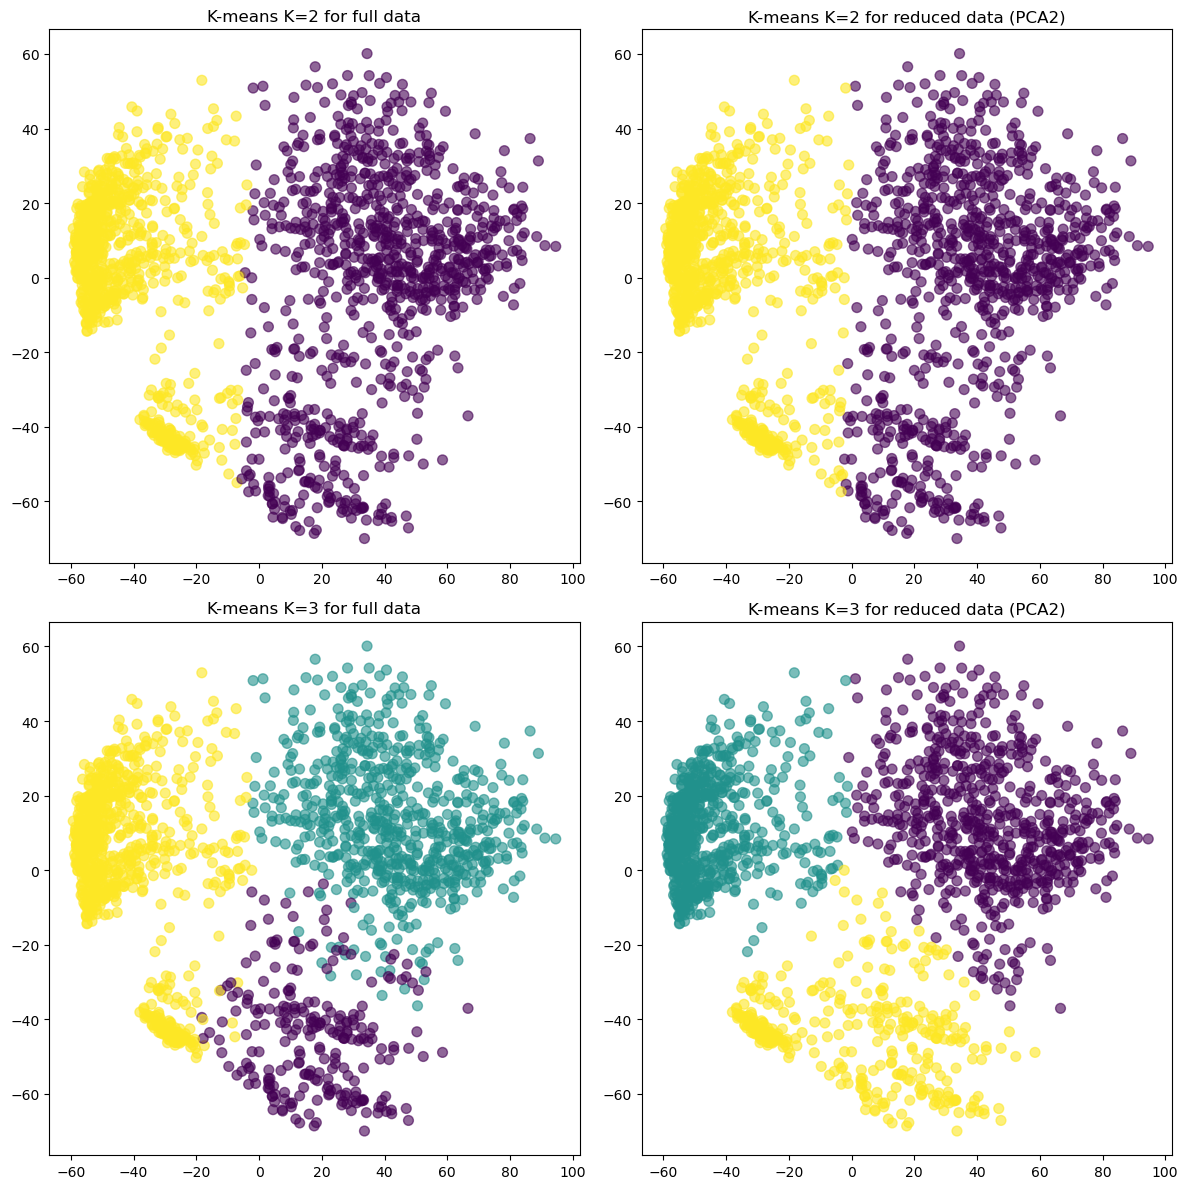

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # 2x2 wykresy

#k=2 df_clr
kmeans1 = KMeans(n_clusters=2)
labels_kmeans1 = kmeans1.fit_predict(df_clr)
axes[0,0].scatter(data[:,0], data[:,1], c=labels_kmeans1, s=50, alpha=0.6)
axes[0,0].set_title("K-means K=2 for full data")

#k=2 PCA
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(data)
axes[0,1].scatter(data[:, 0], data[:, 1], c=kmeans2.labels_, s=50, alpha=0.6)
axes[0,1].set_title("K-means K=2 for reduced data (PCA2)")

#k=3 df_clr
kmeans3 = KMeans(n_clusters=3)
labels_kmeans3 = kmeans3.fit_predict(df_clr)
axes[1,0].scatter(data[:,0], data[:,1], c=labels_kmeans3, s=50, alpha=0.6)
axes[1,0].set_title("K-means K=3 for full data")

#k=3 PCA
kmeans4 = KMeans(n_clusters=3)
kmeans4.fit(data)
axes[1,1].scatter(data[:, 0], data[:, 1], c=kmeans4.labels_, s=50, alpha=0.6)
axes[1,1].set_title("K-means K=3 for reduced data (PCA2)")

plt.tight_layout()
plt.show()

In [12]:
#nie za bardzo widać jakiekolwiek klastry po pca, ale k-means zrobiło co mogło, róznice pomiedzy danymi zredukowanymi i nie są niewielkie
#biorąc pod uwage ze PCA(2) opisuje tylko 30% wariancji cieżko o lepsze wyniki

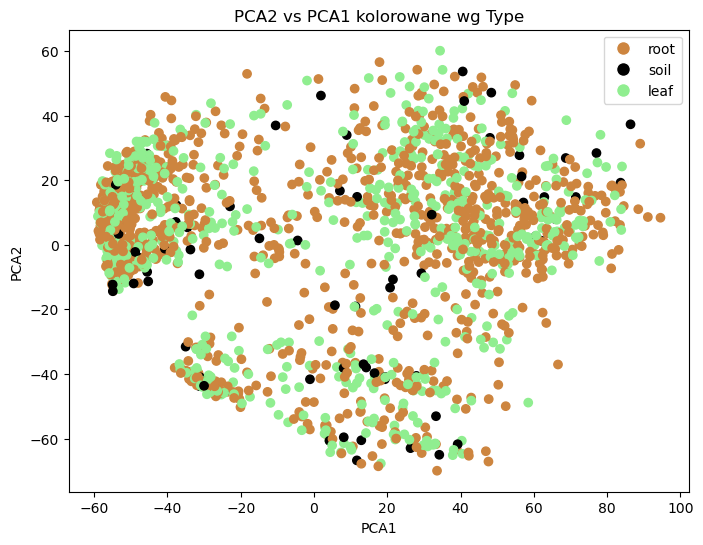

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

SMD = pd.read_csv("SMD.txt", sep="\t")
SMD = SMD.set_index('SampleID')

#indeksy w obu df pasują do sb
types = SMD['Type']  #kolumna z typami próbek
unique_types = types.unique()
colors = ['peru', 'black', 'lightgreen']  #przypisz kolory do typów
color_dict = dict(zip(unique_types, colors))
sample_colors = types.map(color_dict)

plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=sample_colors)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("PCA2 vs PCA1 kolorowane wg Type")
plt.legend(handles=[plt.Line2D([0],[0], marker='o', color='w', label=typ,
              markerfacecolor=color_dict[typ], markersize=10) for typ in unique_types])
plt.show()

In [14]:
# grupy niepokrywają się wgl:((

Sprawdzmy czy zadziała lepiej jak opiszemy wiekszy % wariancji za pomoca pca

In [15]:
from sklearn.decomposition import PCA
pca_new = PCA(0.7) 
data = pca_new.fit_transform(df_clr)

len(pca_new.explained_variance_ratio_) 

39

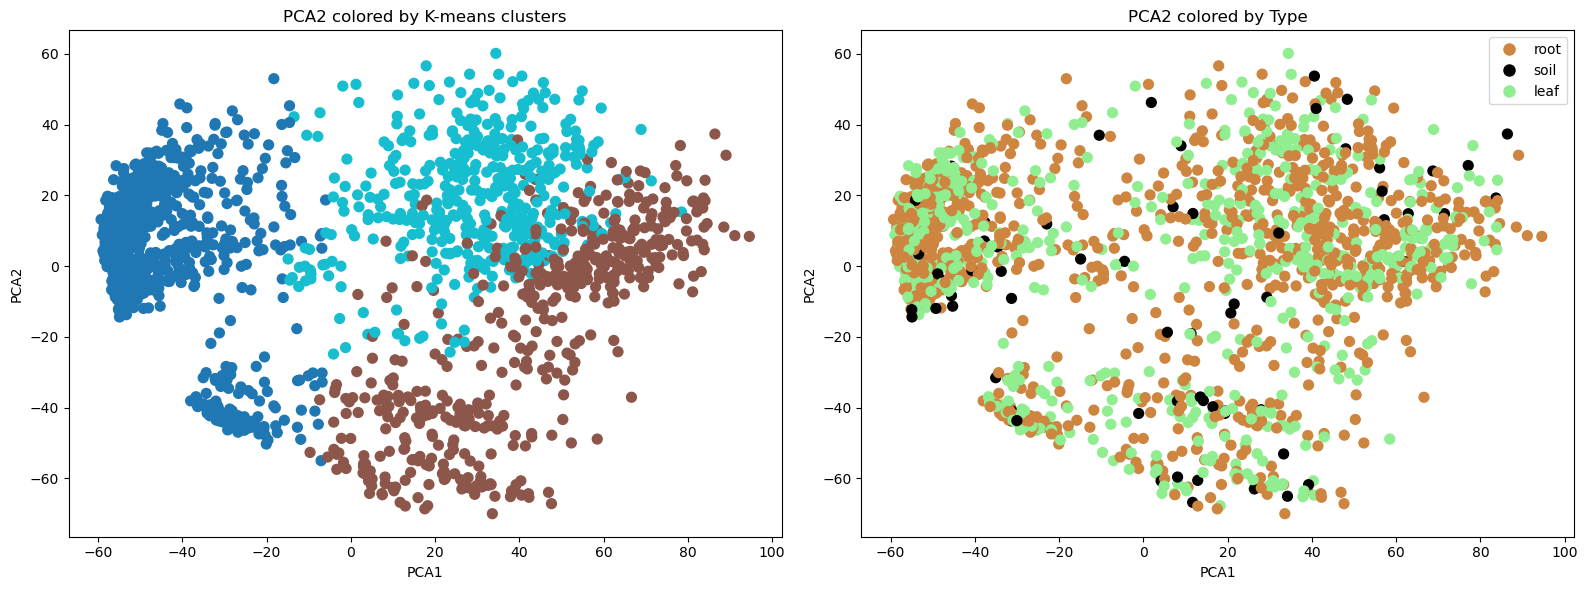

In [16]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#X = features
X = data

#K-means
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X)

#PCA do 2D
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X)

#prepare colors by Type
types_ordered = SMD['Type'] 
unique_types = types_ordered.unique()
colors_type = ['peru', 'black', 'lightgreen']
color_dict_type = dict(zip(unique_types, colors_type))
sample_colors_type = types_ordered.map(color_dict_type)

#graphf\s
fig, axes = plt.subplots(1, 2, figsize=(16,6))

#K-means clusters
axes[0].scatter(X_2D[:,0], X_2D[:,1], c=labels_kmeans, cmap='tab10', s=50)
axes[0].set_xlabel("PCA1")
axes[0].set_ylabel("PCA2")
axes[0].set_title("PCA2 colored by K-means clusters")

#Actual types (for comparison)
axes[1].scatter(X_2D[:,0], X_2D[:,1], c=sample_colors_type, s=50)
axes[1].set_xlabel("PCA1")
axes[1].set_ylabel("PCA2")
axes[1].set_title("PCA2 colored by Type")
#legend
axes[1].legend(handles=[plt.Line2D([0],[0], marker='o', color='w', label=typ,
                                   markerfacecolor=color_dict_type[typ], markersize=10)
                        for typ in unique_types], loc='best')

plt.tight_layout()
plt.show()


# Zadanie2B (2pkt): Zaimplementuj algorytm Gustafsona-Kessela. Zastosuj go do poniższych danych - algorytm powinien sobie poradzić z poprawną klasyfikacją.


* UWAGA: działanie może być (i pewnie będzie) uzależnione od warunków początkowych - warto uruchomić kod kilkakrotnie.

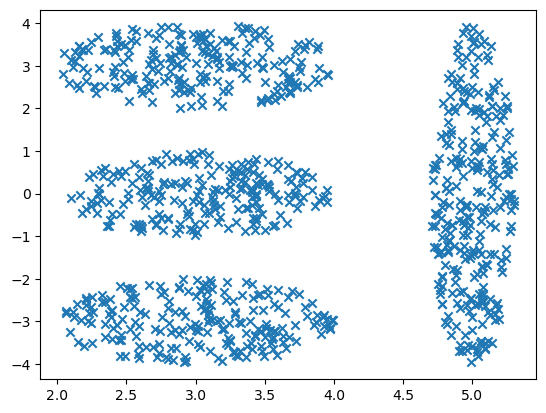

In [17]:
import numpy as np
import matplotlib.pyplot as plt

n = 10000
x = np.random.uniform(-6, 6, n)
y = np.random.uniform(-6, 6, n)

x1 = []
y1 = []
for i in range(n):
    if ((x[i]-5)**2)/0.3**2+((y[i]-0)**2)/4**2 <=1 or ((x[i]-3)**2)/1**2+((y[i]-3)**2)/1**2 <=1 or ((x[i]-3)**2)/1**2+((y[i]-0)**2)/1**2 <=1 or ((x[i]-3)**2)/1**2+((y[i]+3)**2)/1**2 <=1:
        x1.append(x[i])
        y1.append(y[i])
X = np.array([[x,y] for (x,y) in zip(x1,y1)])

plt.scatter(X[:,0],X[:,1], marker = "x")
plt.show()

In [18]:
import numpy as np
import random

#Distance d_ij
def gk_distance(x_j, c_i, A_i):
    """
    Odległość:
    d_ij = sqrt[  (x_j - c_i)^T A_i (x_j - c_i)  ]
    """
    diff = x_j - c_i
    return np.sqrt(diff.T @ A_i @ diff)

#Update miu_ij
def miu_update(X, centers, As, m=2):
    """
    miu_ij = 1 / sum_{k=1..K} (d_ij / d_kj)^(2/(m-1))
    """
    N = X.shape[0]           #liczba punktów
    K = len(centers)         #liczba centroidów
    U = np.zeros((N, K))     #pusta macierz U

    #odległości d_kj
    D = np.zeros((K, N))     # D[k, j] = d(X[j], centers[k])
    for k in range(K):
        for j in range(N):
            d = gk_distance(X[j], centers[k], As[k])
            D[k, j] = d if d != 0 else 1e-10  # unikamy dzielenia przez 0

    # Obliczamy przynależności miu_ij
    for i in range(N):       # iteracja po punktach danych
        for j in range(K):   # iteracja po centroidach
            denom = 0
            for k in range(K):  
                # sumujemy wszystkie (d_ij / d_kj)^(2/(m-1)) dla danego punktu i i centroidu j
                denom += (D[j, i] / D[k, i]) ** (2/(m-1))
            # odwracamy sumę, aby uzyskać miu_ij
            U[i, j] = 1 / denom
            
    return U

#Update centers c_i
def centers_update(X, U, m=2):
    """
    c_i = sum_j miu_ij^m x_j / sum_j miu_ij^m
    """
    N, dim = X.shape
    K = U.shape[1]

    centers = np.zeros((K, dim))

    for i in range(K):  # centroid i
        weights = U[:, i] ** m  # miu_ij^m dla wszystkich punktów j
        num = np.sum(weights[:, None] * X, axis=0)  # sum_j miu_ij^m x_j
        den = np.sum(weights)  # sum_j miu_ij^m
        centers[i] = num / den  # c_i

    return centers

#Update matrix A_i
def update_As(X, centers, U, m=2):
    """
        S_i = sum_j miu_ij^m (x_j - c_i)(x_j - c_i)^T / sum_j miu_ij^m
        A_i = det(S_i)^(1/N) * S_i^{-1}
    """
    N, dim = X.shape
    K = centers.shape[0]

    As = []

    for i in range(K):     # i = klaster
        weights = U[:, i] ** m   # miu_ij^m (j = punkt)

        #S_i
        S_i = np.zeros((dim, dim))
        for j in range(N):       # j = punkt
            diff = (X[j] - centers[i]).reshape(-1, 1)
            S_i += weights[j] * (diff @ diff.T)

        den = np.sum(weights)
        if den == 0:
            den = 1e-10

        S_i = S_i / den

        #A_i: det(S_i)^(1/N) * S_i^{-1)
        det_S = np.linalg.det(S_i)
        det_S_root = det_S ** (1.0 / dim)

        A_i = det_S_root * np.linalg.inv(S_i)

        As.append(A_i)

    return As

#Gustafson_kessel
def gustafson_kessel(X, K=4, m=2, max_iter=50):
    N, dim = X.shape

    # losowa inicjalizacja centrów
    centers = np.array([X[random.randint(0, N-1)] for _ in range(K)])

    # początkowe A_j = I
    As = [np.eye(dim) for _ in range(K)]

    for iteration in range(max_iter):
        U = miu_update(X, centers, As, m)
        centers = centers_update(X, U, m)
        As = update_As(X, centers, U, m)

    return centers, U, As

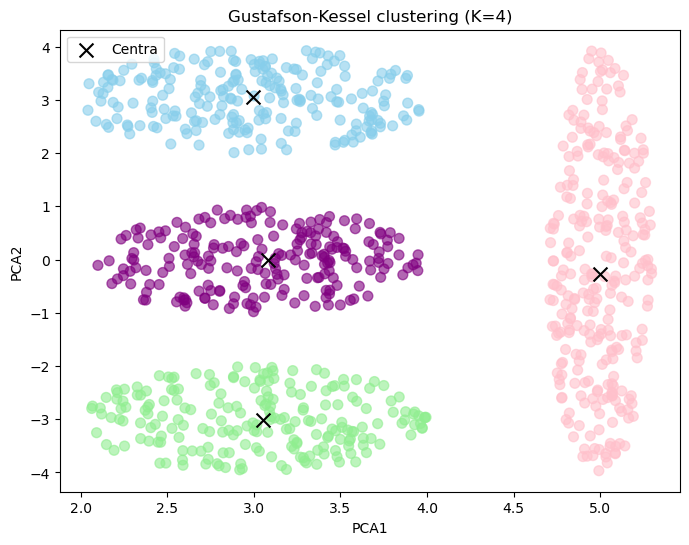

In [19]:
centers, U, As = gustafson_kessel(X, K=4, m=2, max_iter=50)

# przypisanie do klastrów (maksymalne miu_ij)
cluster_labels = np.argmax(U, axis=1)
colors = ['purple', 'lightgreen', 'skyblue','pink'] 
point_colors = [colors[label] for label in cluster_labels]

#wykres
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=point_colors, s=50, alpha=0.6)
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='x', s=100, label='Centra')
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title(f"Gustafson-Kessel clustering (K=4)")
plt.legend()
plt.show()

# Zadanie3 (1pkt): Rozważ sekwencje nukleotydowe (training_set) wybranych wirusow należących do 6. grup. 
    
- narysuj histogram rozkładu długości sekwencji
- zastanów się nad reprezentacją tych sekwencji: k-mery? jakie $k$?
- wykonaj algorytm k-means z $k=6$, zaprezentuj wyniki na zredukowanej przestrzeni za pomocą $PCA(2)$. Porównaj te wyniki podanymi typami.
- potestuj metody grupowania hierarhicznego na tym zbiorze. Czy obserwujesz naturalne nadrgupy?

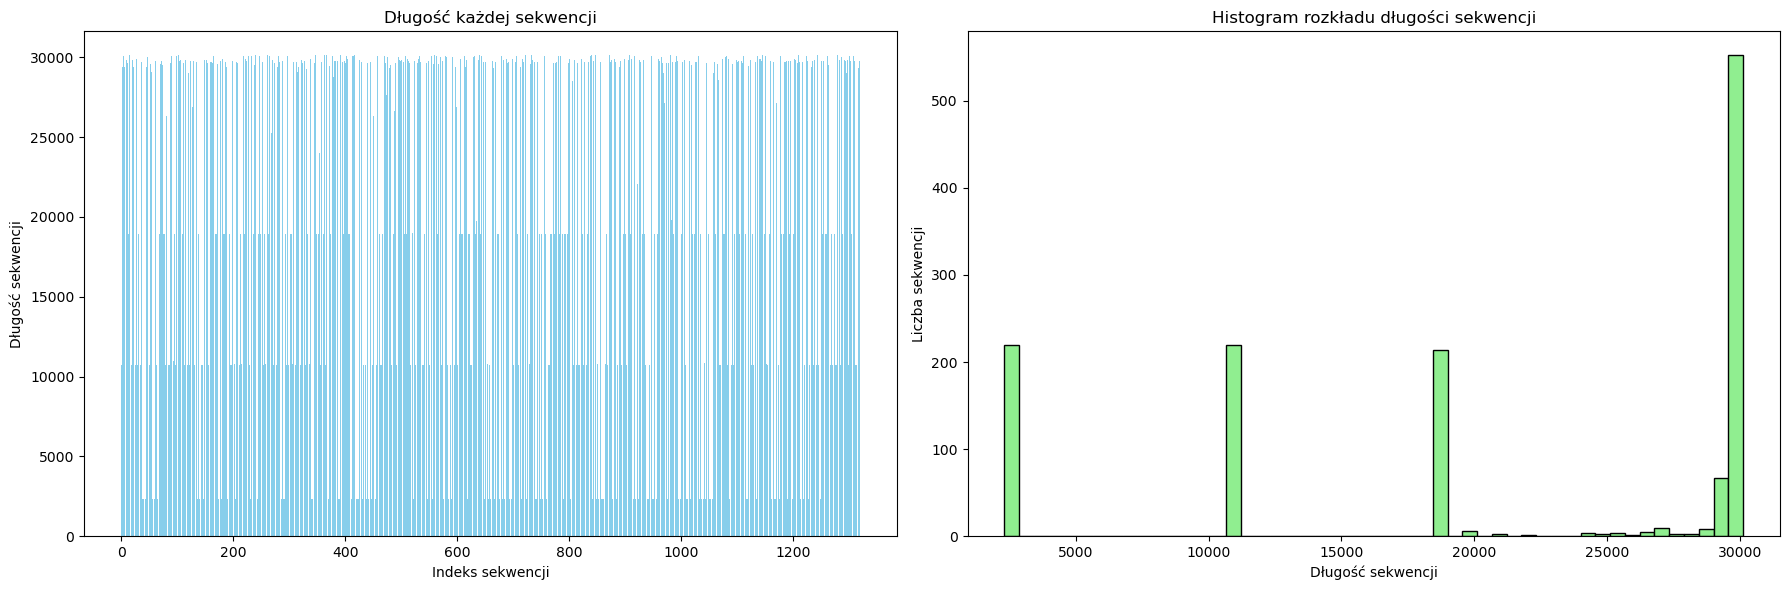

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

seqs = pd.read_csv('training_set.csv')
seq_lengths = seqs['Sequence'].apply(len)

fig, axes = plt.subplots(1, 2, figsize=(18,6))

axes[0].bar(range(len(seq_lengths)), seq_lengths, color='skyblue')
axes[0].set_xlabel("Indeks sekwencji")
axes[0].set_ylabel("Długość sekwencji")
axes[0].set_title("Długość każdej sekwencji")

axes[1].hist(seq_lengths, bins=50, color='lightgreen', edgecolor='black')
axes[1].set_xlabel("Długość sekwencji")
axes[1].set_ylabel("Liczba sekwencji")
axes[1].set_title("Histogram rozkładu długości sekwencji")

plt.tight_layout()
plt.show()

#najwiejcej sekwencji >30000

In [32]:
def kmer_str(seq, k=3):
    """
    Dzieli sekwencję na k-mery i zwraca je jako ciąg znaków oddzielonych spacją.
    """
    N = len(seq)
    kmers_list = [seq[i:(i + k)] for i in range(N - k + 1)]
    return " ".join(kmers_list)

#kmers df - 3-mery dają najsensowniejsza długosc wektora tfidf
k = 3
kmers= seqs['Sequence'].apply(lambda x: kmer_str(x, k=k))

#TF-IDF
vectorizer = TfidfVectorizer()
kmers_vectorised = vectorizer.fit_transform(kmers)

#zamiana sparse matrix na DataFrame
tfidf_df = pd.DataFrame(kmers_vectorised.toarray())

seqs = seqs.drop(columns='Sequence')
seqs = pd.concat([seqs, tfidf_df], axis=1)
print(seqs.head())


     Type         0         1         2         3         4         5  \
0  Class5  0.108500  0.089747  0.090691  0.248478  0.130601  0.095105   
1  Class5  0.094501  0.078641  0.088822  0.229315  0.121596  0.080624   
2  Class3  0.031779  0.108680  0.053288  0.066470  0.130756  0.168357   
3  Class6  0.096106  0.105116  0.051211  0.198219  0.117129  0.087096   
4  Class2  0.039351  0.113133  0.080667  0.067880  0.139941  0.182243   

          6         7         8  ...        54        55        56        57  \
0  0.062476  0.050901  0.040307  ...  0.098752  0.091756  0.059117  0.106142   
1  0.061645  0.048242  0.033806  ...  0.104731  0.098467  0.058331  0.098765   
2  0.063995  0.110864  0.021169  ...  0.079811  0.113289  0.038202  0.162055   
3  0.081335  0.069076  0.018075  ...  0.096397  0.120133  0.039161  0.102422   
4  0.086094  0.114363  0.048598  ...  0.086341  0.118790  0.050571  0.157634   

         58        59        60        61        62        63  
0  0.112188  0.2

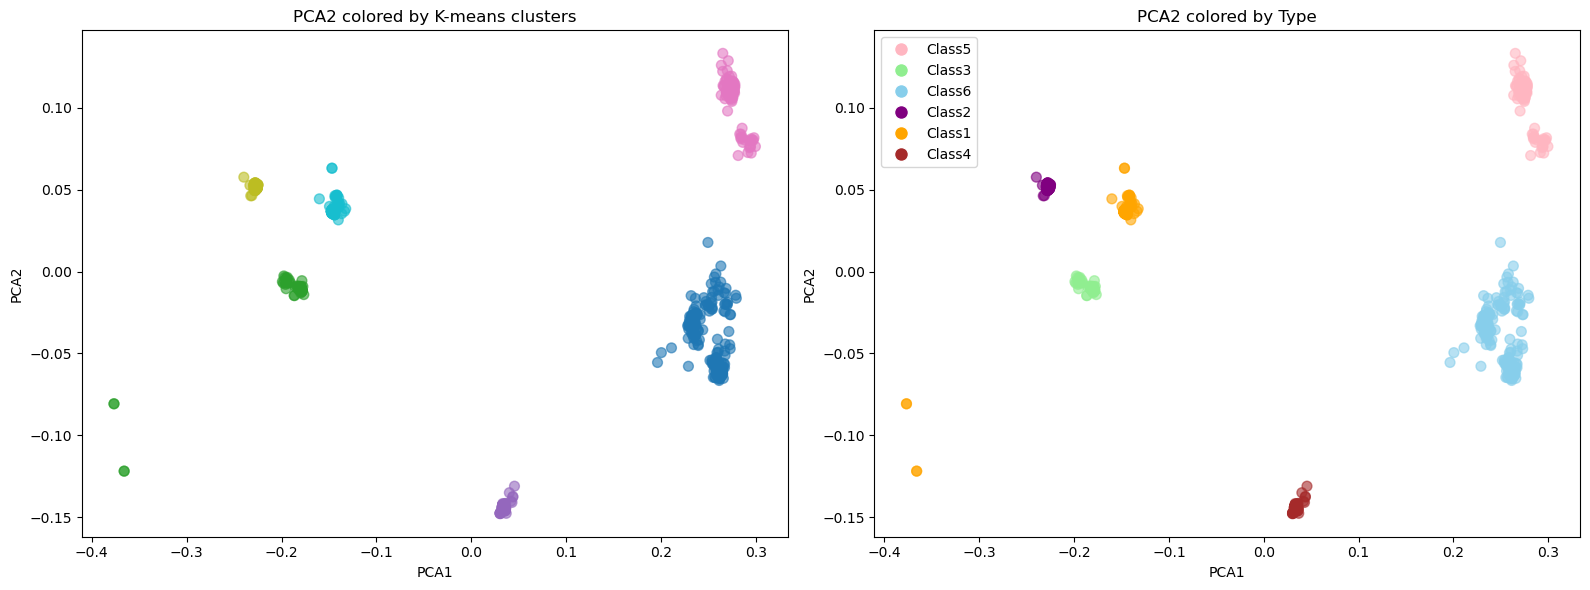

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#X = features
X = seqs.drop(columns=['Type']).values

#K-means
K = 6
kmeans = KMeans(n_clusters=K, random_state=42)
labels_kmeans = kmeans.fit_predict(X)

#PCA do 2D
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X)

#prepare colors by Type
types_ordered = seqs['Type']
unique_types = types_ordered.unique()
colors_type = ['lightpink', 'lightgreen', 'skyblue', 'purple', 'orange', 'brown']
color_dict_type = dict(zip(unique_types, colors_type))
sample_colors_type = types_ordered.map(color_dict_type)

#graphs
fig, axes = plt.subplots(1, 2, figsize=(16,6))

#k-means clusters
axes[0].scatter(X_2D[:,0], X_2D[:,1], c=labels_kmeans, cmap='tab10', s=50, alpha=0.6)
axes[0].set_xlabel("PCA1")
axes[0].set_ylabel("PCA2")
axes[0].set_title("PCA2 colored by K-means clusters")

#actual types (for comparison)
axes[1].scatter(X_2D[:,0], X_2D[:,1], c=sample_colors_type, s=50, alpha=0.6)
axes[1].set_xlabel("PCA1")
axes[1].set_ylabel("PCA2")
axes[1].set_title("PCA2 colored by Type")
axes[1].legend(handles=[plt.Line2D([0],[0], marker='o', color='w', label=typ,
                                   markerfacecolor=color_dict_type[typ], markersize=10)
                        for typ in unique_types], loc='best')

plt.tight_layout()
plt.show()


In [ ]:
#k-means bardzo dobrze sobie poradziło, jedyne co sie nie udało to poprawne zaklasyfikowanie 2 outlierów

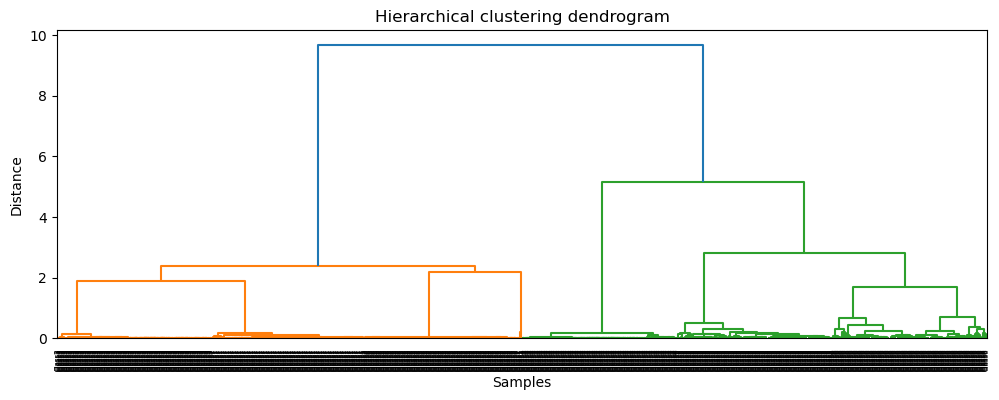

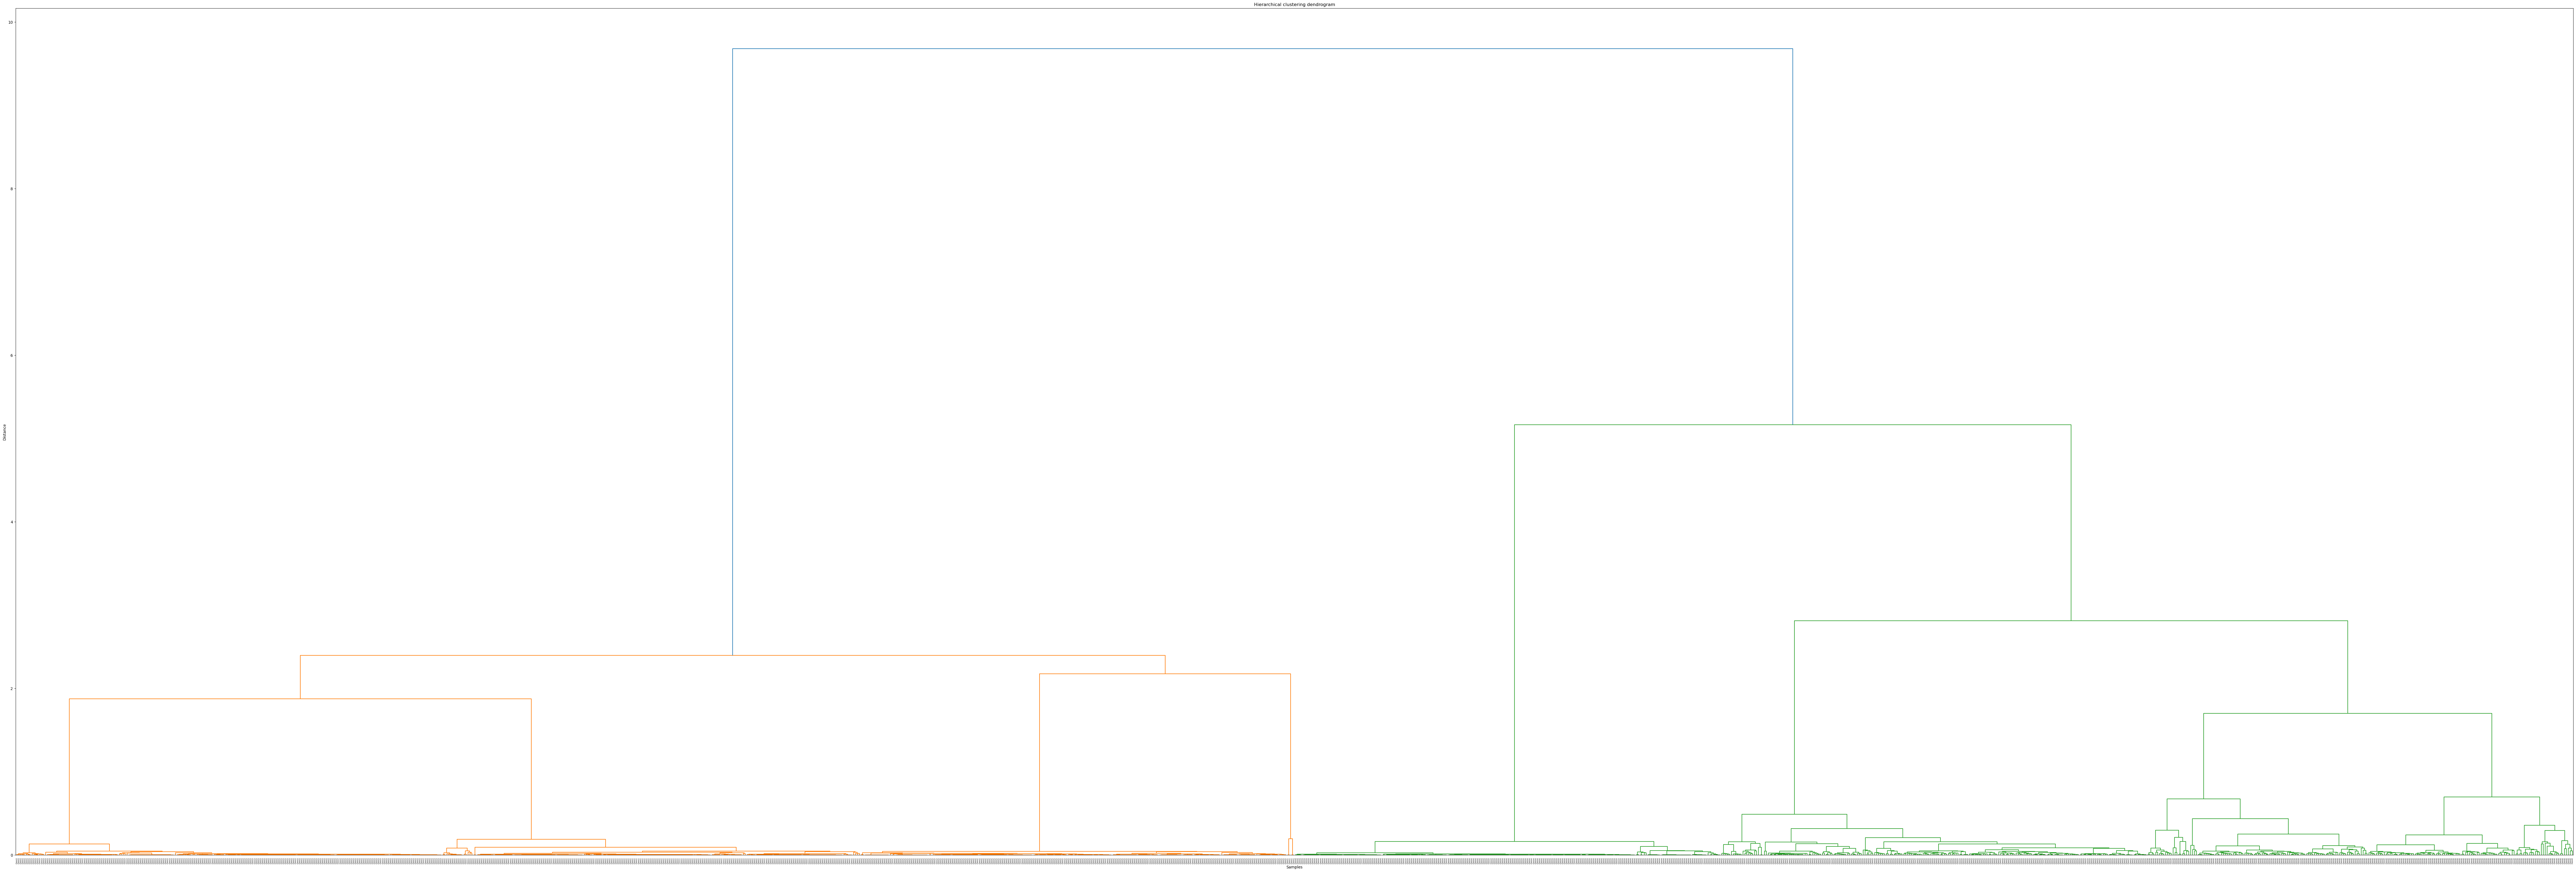

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linkage_data = linkage(X, method='ward', metric='euclidean')

#dendrogram z etykietami typu
plt.figure(figsize=(12, 4))
dendrogram(linkage_data, labels=seqs['Type'].values, leaf_rotation=90)
plt.title("Hierarchical clustering dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

#dokładniejszy wykres do analizy labels
plt.figure(figsize=(120, 40))
dendrogram(linkage_data, labels=seqs['Type'].values, leaf_rotation=90)
plt.title("Hierarchical clustering dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()
#występją naturalne nadgrupy